Only two samples supplied. Realistically, homograph will need to be used in order to test this algorithm with other kartu keluarga

In [1]:
import fitz
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\paoma\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdf_name = "karkel1.pdf"

doc = fitz.open(pdf_name)

for page in doc:
    pix = page.get_pixmap(dpi=600)
    name = pdf_name[:-4] + "-page-" + str(page.number) + ".png"
    pix.save(name)

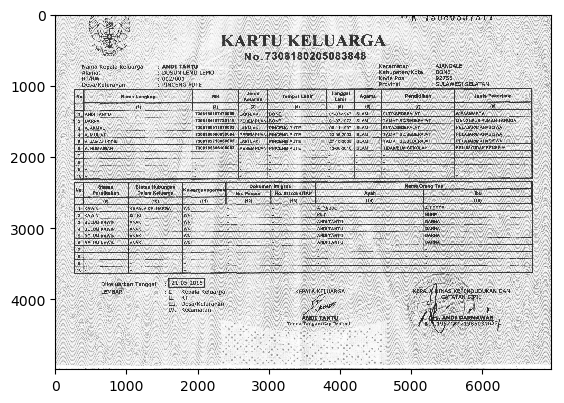

In [9]:
filename = "karkel1-page-0.png"

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

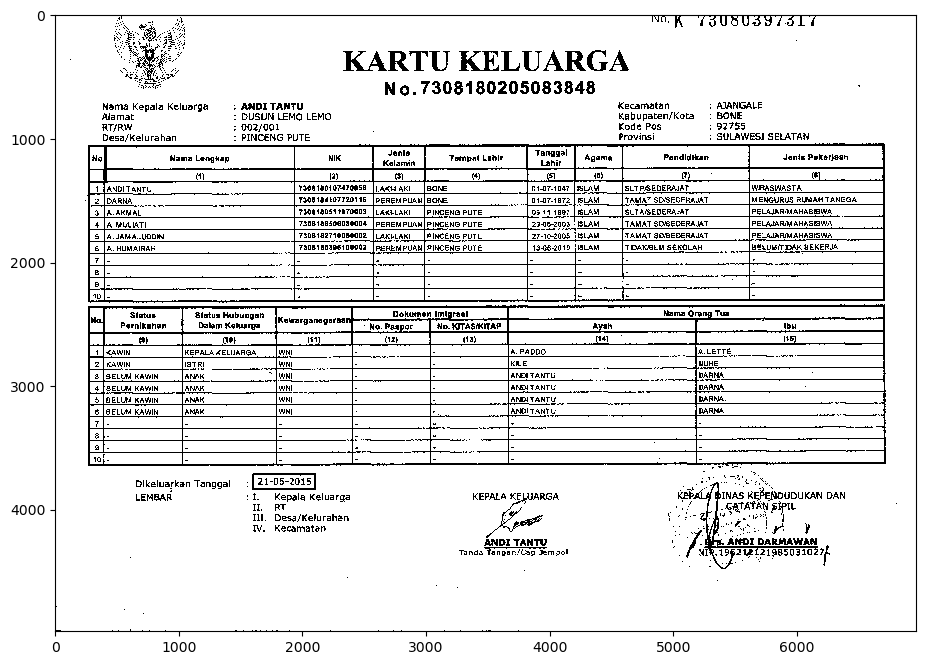

In [10]:
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(30, 8))
plt.imshow(img, cmap="gray")

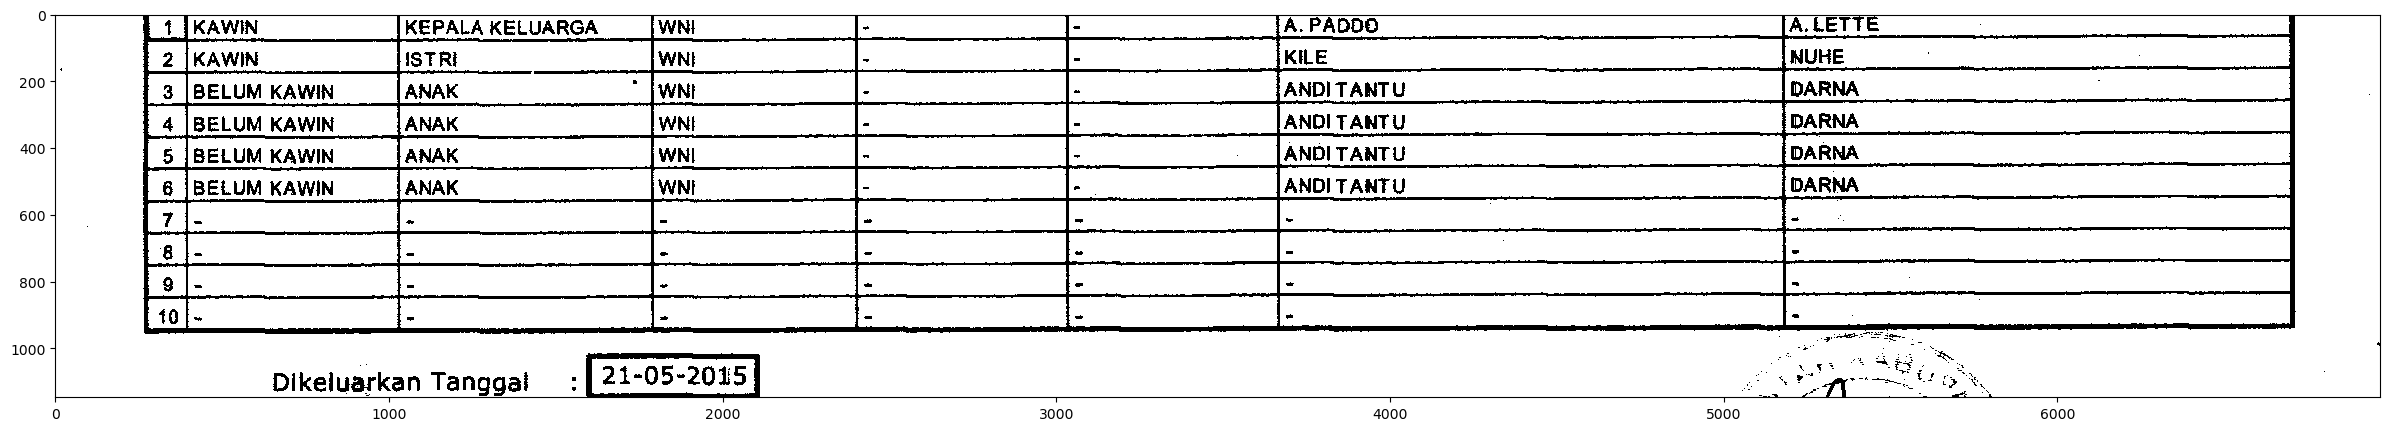

In [32]:
c1 = img[:round(img.shape[0]*0.21),:]
c2 = img[round(img.shape[0]*0.27):round(img.shape[0]*0.47),:]
c3 = img[round(img.shape[0]*0.54):round(img.shape[0]*0.77),:]

plt.figure(figsize=(30, 8))
plt.imshow(c3, cmap="gray")